#Ensemble Learning

##Ensemble Model

Ensemble model using a stacking ensemble classifier , compining KNN,MLP,XGB,NB as base model , and LogisticRegression as meta model(second level calssifier)  

In [ ]:
#ensemble learing in two levels base models , then the results used in the meta model
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf', rf_classifier),
        ('knn', knn_classifier),
        ('xgb', xgb_classifier),
        ('mlp', mlp_classifier),
        ('nb', nb_classifier)
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_classifier.fit(data_train_resampled, target_train_resampled)

# Evaluate performance
accuracy_en_stacking = stacking_classifier.score(data_test, target_test)
print(f'Test Accuracy: {accuracy_en_stacking* 100:.2f}%')

Test Accuracy: 99.18%


In [ ]:
#checking if there is overfitting
y_pred_train_ensemble1 = stacking_classifier.predict(data_train_resampled)
training_accuracy_en1 = accuracy_score(target_train_resampled, y_pred_train_ensemble1)
y_pred_test_ensemble1 = stacking_classifier.predict(data_test)
testing_accuracy_en1= accuracy_score(target_test, y_pred_test_ensemble1)

print(f'Training Accuracy: {training_accuracy_en1 * 100:.2f}%' ,f'Testing Accuracy: {testing_accuracy_en1 * 100:.2f}%' )

Training Accuracy: 99.94% Testing Accuracy: 99.18%


In [ ]:
testing_accuracy_en1 = accuracy_score(target_test, y_pred_test_ensemble1)
print(f'Ensemble Accuracy: {testing_accuracy_en1 * 100:.2f}%')
print("Classification Report for Ensemble:\n", classification_report(target_test,y_pred_test_ensemble1 ))

Ensemble Accuracy: 99.18%
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      2617
           1       0.99      0.87      0.93       462
           2       0.95      0.94      0.94      3290
           3       1.00      1.00      1.00     66938
           4       0.95      0.93      0.94      1626

    accuracy                           0.99     74933
   macro avg       0.96      0.95      0.95     74933
weighted avg       0.99      0.99      0.99     74933



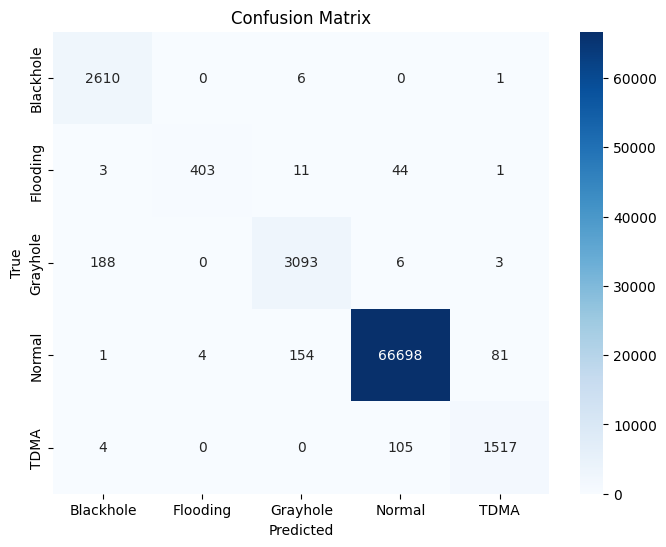

In [ ]:
# Plotting confusion matrix
class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']
cm = confusion_matrix(target_test,y_pred_test_ensemble1)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


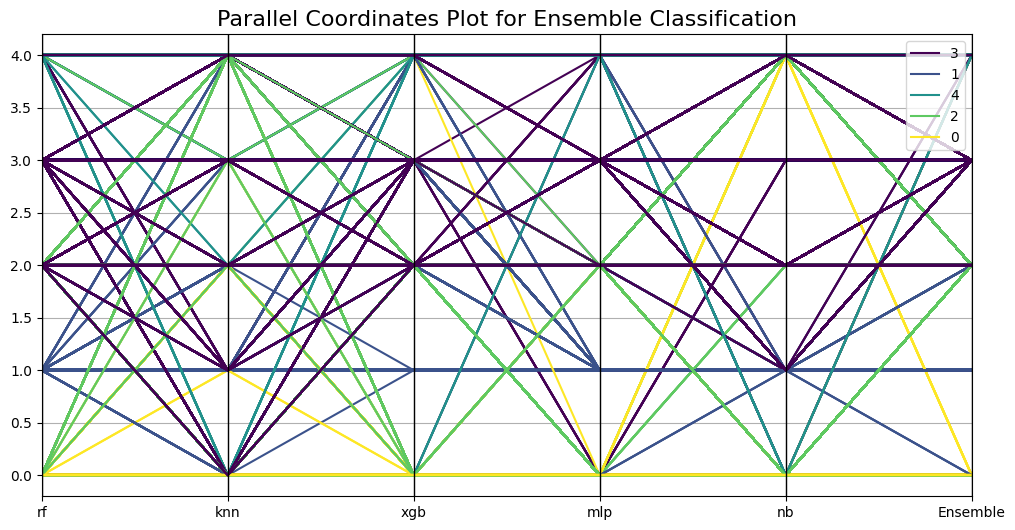

In [ ]:
# Create a DataFrame for parallel coordinates plot
data = pd.DataFrame({
    'rf':  target_pred_rf,
    'knn': target_pred_knn,
    'xgb':  target_pred_xgb,
    'mlp': y_pred_mlp,
    'nb': target_pred_nb,
    'Ensemble': y_pred_test_ensemble1,
    'True Label': target_test
})

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(data, 'True Label', colormap='viridis')
plt.title('Parallel Coordinates Plot for Ensemble Classification', fontsize=16)
plt.show()

##Previous Ensemble Model Experiments

Ensmble model using fixed weights for KNN,ANN,XGB,NB,RF

In [ ]:
#ensemble model using KNN, MLP ,XGB ,RF,NB and fixed weights
weights = {'rf': 0.3, 'knn': 0.133, 'xgb': 0.133, 'mlp': 0.3, 'nb': 0.133}
# Convert keys to integers
weights = {i: value for i, value in enumerate([0.3, 0.133, 0.133, 0.3, 0.133])}

# Rest of the code
ensemble_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('knn', knn_classifier),
        ('xgb', xgb_classifier),
        ('mlp', mlp_classifier),
        ('nb', nb_classifier)
    ],
    voting='soft',
    weights=weights
)

ensemble_classifier.fit(data_train_resampled, target_train_resampled)
y_pred_ensemble = ensemble_classifier.predict(data_test)

In [ ]:
y_pred_train_ensemble = ensemble_classifier.predict(data_train_resampled)
training_accuracy_en = accuracy_score(target_train_resampled, y_pred_train_ensemble)
testing_accuracy_en= accuracy_score(target_test, y_pred_ensemble)


In [ ]:
print(training_accuracy_en,testing_accuracy_en)

0.986142709410548 0.9724020124644682


In [ ]:
#calculating the testing accuracy for the Ensemble model
accuracy = accuracy_score(target_test, y_pred_ensemble)
print(f'Ensemble Accuracy: {accuracy * 100:.2f}%')
print("Classification Report for Ensemble:\n", classification_report(target_test,y_pred_ensemble ))

Ensemble Accuracy: 97.24%
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84      2617
           1       0.94      0.95      0.94       462
           2       0.79      0.67      0.73      3290
           3       1.00      0.99      0.99     66938
           4       0.83      0.93      0.88      1626

    accuracy                           0.97     74933
   macro avg       0.86      0.91      0.88     74933
weighted avg       0.98      0.97      0.97     74933



In [ ]:
#checking if there is overfitting
train_accuracy_en = ensemble_classifier.score(data_train_resampled, target_train_resampled)
test_accuracy_en = ensemble_classifier.score(data_test, target_test)
print(f'Training Accuracy: {train_accuracy_en}')
print(f'Test Accuracy: {test_accuracy_en}')

Training Accuracy: 0.986142709410548
Test Accuracy: 0.9724020124644682


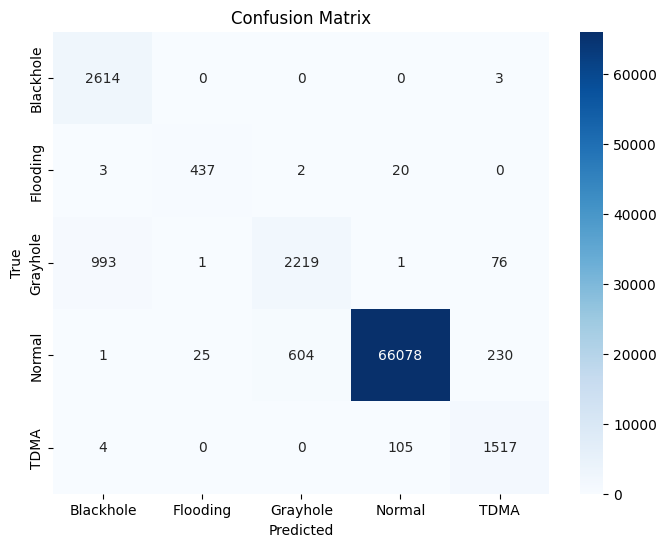

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ['Blackhole', 'Flooding', 'Grayhole', 'Normal', 'TDMA']
cm = confusion_matrix(target_test, y_pred_ensemble)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_en = confusion_matrix(target_test, y_pred_ensemble)

# Number of classes
num_classes = len(conf_matrix_en)
class_labels = ["blackhole", "flooding", "grayhole", "normal", "tdma"]

TP_per_class = []
FP_per_class = []
for i in range(len(class_labels)):
    # For each class i, TP is in the diagonal position (i, i) of the confusion matrix
    TP = conf_matrix_en[i, i]
    # FP for class i is the sum of predictions for class i across other actual classes
    FP = sum(conf_matrix_en[j, i] for j in range(len(class_labels)) if j != i)

    TP_per_class.append(TP)
    FP_per_class.append(FP)

# Print TP and FP for each class
for i in range(len(class_labels)):
    print(f'Class {class_labels[i]} - True Positives (TP): {TP_per_class[i]}, False Positives (FP): {FP_per_class[i]}')

Class blackhole - True Positives (TP): 2614, False Positives (FP): 1001
Class flooding - True Positives (TP): 437, False Positives (FP): 26
Class grayhole - True Positives (TP): 2219, False Positives (FP): 606
Class normal - True Positives (TP): 66078, False Positives (FP): 126
Class tdma - True Positives (TP): 1517, False Positives (FP): 309


Ensemble model using KNN,MLP,DT,NB,XGB and use MAXvoting method

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
#ensemble model using KNN, MLP ,XGB ,DT,NB and using max voting method
class MaxVotingEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, knn_classifier, dt_classifier, xgb_classifier, mlp_classifier, nb_classifier):
        self.knn_classifier = knn_classifier
        self.dt_classifier = dt_classifier
        self.xgb_classifier = xgb_classifier
        self.mlp_classifier = mlp_classifier
        self.nb_classifier = nb_classifier

    def fit(self, X, y):
        self.knn_classifier.fit(X, y)
        self.dt_classifier.fit(X, y)
        self.xgb_classifier.fit(X, y)
        self.mlp_classifier.fit(X, y)
        self.nb_classifier.fit(X, y)
        return self

    def predict(self, X):
        pred_knn = self.knn_classifier.predict(X)
        pred_dt = self.dt_classifier.predict(X)
        pred_xgb = self.xgb_classifier.predict(X)
        pred_mlp = self.mlp_classifier.predict(X)
        pred_nb = self.nb_classifier.predict(X)

        ensemble_prediction = np.maximum.reduce([pred_knn, pred_dt, pred_xgb, pred_mlp, pred_nb])
        return ensemble_prediction

ensemble_classifier_max = MaxVotingEnsembleClassifier(
    knn_classifier, dt_classifier, xgb_classifier, mlp_classifier, nb_classifier
)
ensemble_classifier_max.fit(data_train_resampled, target_train_resampled)

# Predict the values using the ensemble classifier
y_pred_ensemble_max = ensemble_classifier_max.predict(data_test)

# Evaluate the accuracy
accuracy_en_max= accuracy_score(target_test, y_pred_ensemble_max)
print(f'Ensemble Model Accuracy with "max" voting: {accuracy_en_max * 100:.2f}%')

Ensemble Model Accuracy with "max" voting: 96.52%


wieghted ensemble model using KNN, MLP ,XGB ,DT,NB and learning the weights using ANN

In [ ]:
#wieghted ensemble model using KNN, MLP ,XGB ,DT,NB and learning the weughts using ANN
from tensorflow import keras
pred_knn = knn_classifier.predict(data_test)
pred_dt = dt_classifier.predict(data_test)
pred_xgb = xgb_classifier.predict(data_test)
pred_mlp = mlp_classifier.predict(data_test)
pred_nb = nb_classifier.predict(data_test)

# Stack the predictions as features for the meta-model
meta_features = np.column_stack((pred_knn, pred_dt, pred_xgb, pred_mlp, pred_nb))

# Neural network for learning ensemble weights
model_en = keras.Sequential([
    keras.layers.Dense(40, activation='relu', input_shape=(5,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_en.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have a binary target variable (0 or 1), adjust as needed
# You might need one-hot encoding or different loss function for multi-class scenarios

# Train the neural network to learn the ensemble weights
model_en.fit(meta_features, target_test, epochs=10, verbose=1)

# Make predictions using the ensemble weights learned by the neural network
ensemble_weights = model_en.predict(meta_features)
ensemble_weights /= ensemble_weights.sum()  # Normalize weights to sum to 1

# Combine predictions from base models with learned weights
ensemble_prediction = (
    ensemble_weights[0] * pred_knn +
    ensemble_weights[1] * pred_dt +
    ensemble_weights[2] * pred_xgb +
    ensemble_weights[3] * pred_mlp +
    ensemble_weights[4] * pred_nb
)

# Binary classification thresholding
ensemble_prediction_binary = (ensemble_prediction > 0.5).astype(int)

# Evaluate the accuracy
accuracy_en_ann = accuracy_score(target_test, ensemble_prediction_binary)
print(f'Ensemble Model Accuracy: {accuracy_en_ann * 100:.2f}%')

Epoch 1/10
2342/2342 [==============================] - 6s 2ms/step - loss: -2203.9246 - accuracy: 0.0062
Epoch 2/10
2342/2342 [==============================] - 4s 2ms/step - loss: -14955.6553 - accuracy: 0.0062
Epoch 3/10
2342/2342 [==============================] - 4s 2ms/step - loss: -37613.2383 - accuracy: 0.0062
Epoch 4/10
2342/2342 [==============================] - 5s 2ms/step - loss: -68833.8672 - accuracy: 0.0062
Epoch 5/10
2342/2342 [==============================] - 4s 2ms/step - loss: -108619.9375 - accuracy: 0.0062
Epoch 6/10
2342/2342 [==============================] - 4s 2ms/step - loss: -156597.3906 - accuracy: 0.0062
Epoch 7/10
2342/2342 [==============================] - 5s 2ms/step - loss: -212690.2188 - accuracy: 0.0062
Epoch 8/10
2342/2342 [==============================] - 4s 2ms/step - loss: -276808.9688 - accuracy: 0.0062
Epoch 9/10
2342/2342 [==============================] - 4s 2ms/step - loss: -348929.3438 - accuracy: 0.0062
Epoch 10/10
2342/2342 [==========

Ensemble model using KNN,DT,SGD,MLP,NB

In [ ]:
ensemble_classifier_0 = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('dt', dt_classifier),
        ('sgd', sgd_classifier),
        ('mlp', mlp_classifier),
        ('nb',nb_classifier)
    ],
    voting='hard'
)
ensemble_classifier_0.fit(data_train_resampled, target_train_resampled)
# Predict the values using the Ensemble model
y_pred_ensemble_0 = ensemble_classifier_0.predict(data_test)
accuracy_en_0 = accuracy_score(target_test, y_pred_ensemble_0)
print(f'Ensemble Model Accuracy: {accuracy_en_0 * 100:.2f}%')

Ensemble Model Accuracy: 96.72%
